# Prep

In [ ]:
from google.colab import userdata
from collections import defaultdict
import json
import os
import pandas as pd

from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    print(line)
    return

In [ ]:
path_project = userdata.get('PATH_PROJECT')
path_crops = os.path.join(path_project, 'crops')
path_metadata = os.path.join(path_crops, "annotations_metadata.json")

# Crop arrangement

In [ ]:
with open(path_metadata) as f:
    metadata = json.load(f)

In [ ]:
print(json.dumps(metadata[:2], indent=2))

[
  {
    "crop_id": 4547601,
    "image_source": "Fuziki",
    "bp_case": "10",
    "method": "new",
    "color": "RED",
    "score": 0,
    "roi": [
      2650,
      2789,
      20,
      20
    ],
    "IQE_workspace_number": 990
  },
  {
    "crop_id": 4547602,
    "image_source": "Fuziki",
    "bp_case": "10",
    "method": "ref",
    "color": "ORANGE",
    "score": 0.5,
    "roi": [
      2650,
      2789,
      20,
      20
    ],
    "IQE_workspace_number": 990
  }
]


How I want the metadata:
```
{
    (image_source, bp_case, tuple(roi)): {
        method: {
            crop_id: ,
            score: ,
        },

        method: {
            crop_id: ,
            score: ,
        }
    }
}
```

In [ ]:
grouped_crops = defaultdict(dict)

for crop in metadata:
    # key info
    source = crop["image_source"]
    bp_case = crop["bp_case"]
    roi = crop["roi"]

    # values
    crop_id = crop["crop_id"]
    score = crop["score"]

    key = tuple([source, bp_case, tuple(roi)])
    val = {
        "crop_id": crop_id,
        "score": score,
    }

    method = crop["method"]
    grouped_crops[key][method] = val

In [ ]:
print(f"len = {len(grouped_crops)}")

for (k, group), _ in zip(grouped_crops.items(), range(2)):
    print(f'''{k}: {json.dumps(group, indent=2)}
          ''')

len = 2016
('Fuziki', '10', (2650, 2789, 20, 20)): {
  "new": {
    "crop_id": 4547601,
    "score": 0
  },
  "ref": {
    "crop_id": 4547602,
    "score": 0.5
  },
  "gt": {
    "crop_id": 4547604,
    "score": 1
  },
  "bp_map": {
    "crop_id": 4547603,
    "score": 0
  }
}
          
('Fuziki', '10', (1620, 1057, 20, 20)): {
  "new": {
    "crop_id": 4547609,
    "score": 0
  },
  "ref": {
    "crop_id": 4547610,
    "score": 0.5
  },
  "gt": {
    "crop_id": 4547612,
    "score": 1
  },
  "bp_map": {
    "crop_id": 4547611,
    "score": 0
  }
}
          


In [ ]:
# which groups don't have 4 items
for k, group in grouped_crops.items():
    if len(group) != 4:
        print(f"{len(group)} in {k}: {group}")

2 in ('TE42', '21', (4470, 863, 20, 20)): {'new': {'crop_id': 4579906, 'score': 0}, 'bp_map': {'crop_id': 4579908, 'score': 0}}
1 in ('TE42', '21', (4023, 2568, 20, 20)): {'new': {'crop_id': 4579990, 'score': 0}}
1 in ('TE42', '21', (6936, 2120, 20, 20)): {'new': {'crop_id': 4580086, 'score': 0}}
1 in ('TE42', '21', (2790, 3015, 20, 20)): {'new': {'crop_id': 4580282, 'score': 0}}
1 in ('TE42', '21', (2596, 3828, 20, 20)): {'new': {'crop_id': 4580390, 'score': 0}}
1 in ('TE42', '21', (8362, 3322, 20, 20)): {'new': {'crop_id': 4580546, 'score': 0}}
1 in ('Fuziki', '6', (1699, 1645, 20, 20)): {'bp_map': {'crop_id': 4620194, 'score': 0}}


In [ ]:
df = pd.DataFrame(
    index=grouped_crops.keys(),
    data=grouped_crops.values(),
    columns=["bp_map", "gt", "new", "ref"]
)
df = df.dropna() # crops groups that don't have 4 members

display(df)

bp_map  \
Fuziki 10 (2650, 2789, 20, 20)  {'crop_id': 4547603, 'score': 0}   
          (1620, 1057, 20, 20)  {'crop_id': 4547611, 'score': 0}   
          (4412, 2515, 20, 20)  {'crop_id': 4547643, 'score': 0}   
          (2761, 2963, 20, 20)  {'crop_id': 4547659, 'score': 0}   
          (1195, 2567, 20, 20)  {'crop_id': 4547679, 'score': 0}   
...                                                          ...   
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730027, 'score': 0}   
          (2765, 2093, 20, 18)  {'crop_id': 4730031, 'score': 0}   
          (2793, 2121, 16, 15)  {'crop_id': 4730035, 'score': 0}   
          (2822, 2091, 18, 16)  {'crop_id': 4730039, 'score': 0}   
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730043, 'score': 0}   

                                                              gt  \
Fuziki 10 (2650, 2789, 20, 20)  {'crop_id': 4547604, 'score': 1}   
          (1620, 1057, 20, 20)  {'crop_id': 4547612, 'score': 1}   
          (4412, 2515, 20, 20)  {'crop_id': 4547644, 'score': 1}   
          (2761, 2963, 20, 20)  {'crop_id': 4547660, 'score': 1}   
          (1195, 2567, 20, 20)  {'crop_id': 4547680, 'score': 1}   
...                                                          ...   
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730028, 'score': 1}   
          (2765, 2093, 20, 18)  {'crop_id': 4730032, 'score': 1}   
          (2793, 2121, 16, 15)  {'crop_id': 4730036, 'score': 1}   
          (2822, 2091, 18, 16)  {'crop_id': 4730040, 'score': 1}   
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730044, 'score': 1}   

                                                             new  \
Fuziki 10 (2650, 2789, 20, 20)  {'crop_id': 4547601, 'score': 0}   
          (1620, 1057, 20, 20)  {'crop_id': 4547609, 'score': 0}   
          (4412, 2515, 20, 20)  {'crop_id': 4547641, 'score': 0}   
          (2761, 2963, 20, 20)  {'crop_id': 4547657, 'score': 0}   
          (1195, 2567, 20, 20)  {'crop_id': 4547677, 'score': 0}   
...                                                          ...   
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730026, 'score': 1}   
          (2765, 2093, 20, 18)  {'crop_id': 4730030, 'score': 1}   
          (2793, 2121, 16, 15)  {'crop_id': 4730034, 'score': 1}   
          (2822, 2091, 18, 16)  {'crop_id': 4730038, 'score': 1}   
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730042, 'score': 1}   

                                                               ref  
Fuziki 10 (2650, 2789, 20, 20)  {'crop_id': 4547602, 'score': 0.5}  
          (1620, 1057, 20, 20)  {'crop_id': 4547610, 'score': 0.5}  
          (4412, 2515, 20, 20)  {'crop_id': 4547642, 'score': 0.5}  
          (2761, 2963, 20, 20)  {'crop_id': 4547658, 'score': 0.5}  
          (1195, 2567, 20, 20)  {'crop_id': 4547678, 'score': 0.5}  
...                                                            ...  
RES40  14 (2703, 2141, 25, 23)    {'crop_id': 4730025, 'score': 0}  
          (2765, 2093, 20, 18)    {'crop_id': 4730029, 'score': 0}  
          (2793, 2121, 16, 15)    {'crop_id': 4730033, 'score': 0}  
          (2822, 2091, 18, 16)    {'crop_id': 4730037, 'score': 0}  
TE42   14 (8335, 1737, 16, 16)    {'crop_id': 4730041, 'score': 0}  

[2009 rows x 4 columns]

In [ ]:
# crop groups that are not 20x20
df[[(20, 20) != idx[2][2:] for idx in df.index]]

bp_map  \
Fuziki 10 (2735, 2460, 23, 18)  {'crop_id': 4580665, 'score': 0}   
TE42   8  (8649, 1842, 17, 14)  {'crop_id': 4592698, 'score': 0}   
          (7380, 1868, 21, 15)  {'crop_id': 4592702, 'score': 0}   
Fuziki 11 (2537, 918, 20, 19)   {'crop_id': 4592706, 'score': 0}   
          (3298, 1057, 14, 18)  {'crop_id': 4592720, 'score': 0}   
...                                                          ...   
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730027, 'score': 0}   
          (2765, 2093, 20, 18)  {'crop_id': 4730031, 'score': 0}   
          (2793, 2121, 16, 15)  {'crop_id': 4730035, 'score': 0}   
          (2822, 2091, 18, 16)  {'crop_id': 4730039, 'score': 0}   
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730043, 'score': 0}   

                                                              gt  \
Fuziki 10 (2735, 2460, 23, 18)  {'crop_id': 4580667, 'score': 1}   
TE42   8  (8649, 1842, 17, 14)  {'crop_id': 4592699, 'score': 1}   
          (7380, 1868, 21, 15)  {'crop_id': 4592703, 'score': 1}   
Fuziki 11 (2537, 918, 20, 19)   {'crop_id': 4592710, 'score': 0}   
          (3298, 1057, 14, 18)  {'crop_id': 4592722, 'score': 1}   
...                                                          ...   
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730028, 'score': 1}   
          (2765, 2093, 20, 18)  {'crop_id': 4730032, 'score': 1}   
          (2793, 2121, 16, 15)  {'crop_id': 4730036, 'score': 1}   
          (2822, 2091, 18, 16)  {'crop_id': 4730040, 'score': 1}   
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730044, 'score': 1}   

                                                               new  \
Fuziki 10 (2735, 2460, 23, 18)    {'crop_id': 4580664, 'score': 0}   
TE42   8  (8649, 1842, 17, 14)    {'crop_id': 4592697, 'score': 1}   
          (7380, 1868, 21, 15)  {'crop_id': 4592701, 'score': 0.5}   
Fuziki 11 (2537, 918, 20, 19)     {'crop_id': 4592704, 'score': 0}   
          (3298, 1057, 14, 18)    {'crop_id': 4592719, 'score': 0}   
...                                                            ...   
RES40  14 (2703, 2141, 25, 23)    {'crop_id': 4730026, 'score': 1}   
          (2765, 2093, 20, 18)    {'crop_id': 4730030, 'score': 1}   
          (2793, 2121, 16, 15)    {'crop_id': 4730034, 'score': 1}   
          (2822, 2091, 18, 16)    {'crop_id': 4730038, 'score': 1}   
TE42   14 (8335, 1737, 16, 16)    {'crop_id': 4730042, 'score': 1}   

                                                             ref  
Fuziki 10 (2735, 2460, 23, 18)  {'crop_id': 4580666, 'score': 1}  
TE42   8  (8649, 1842, 17, 14)  {'crop_id': 4592696, 'score': 0}  
          (7380, 1868, 21, 15)  {'crop_id': 4592700, 'score': 0}  
Fuziki 11 (2537, 918, 20, 19)   {'crop_id': 4592709, 'score': 0}  
          (3298, 1057, 14, 18)  {'crop_id': 4592721, 'score': 1}  
...                                                          ...  
RES40  14 (2703, 2141, 25, 23)  {'crop_id': 4730025, 'score': 0}  
          (2765, 2093, 20, 18)  {'crop_id': 4730029, 'score': 0}  
          (2793, 2121, 16, 15)  {'crop_id': 4730033, 'score': 0}  
          (2822, 2091, 18, 16)  {'crop_id': 4730037, 'score': 0}  
TE42   14 (8335, 1737, 16, 16)  {'crop_id': 4730041, 'score': 0}  

[160 rows x 4 columns]

In [ ]:
%%skip Comment out skip to save

df.to_csv('grouped_crops_data.csv')
print("DataFrame saved to grouped_crops_data.csv")

Comment out skip to save


## Testing keys

In [ ]:
# bp_case + roi -> unique key

keys = grouped_crops.keys()
id = [(k[1], k[2]) for k in keys]

print(len(keys))
print(len(set(id)))

2016
2016


# Make dataset

## New metadata
```
[
    {
        'sample_id': unique string for a pair,
        'clean_image': file_name,
        'distorted_image': file_name,
        'score': number [0..1], 0 is different,
        'metadata': {
            'image_source': source,
            'bp_case': 'case' + number,
            'method': 'new' or 'ref',
            'roi': coordinates,
            'bp_map': file_name
            }
    },
   ...
]
```

In [ ]:
# Only crop groups that are full && 20x20

clean_groups = {
    tup : crops
    for tup, crops in grouped_crops.items()
    if tup[2][2:] == (20,20) and len(crops) == 4
    }

print(f"number of clean groups: {len(clean_groups)}")
display(clean_groups)

number of clean groups: 1849


{('Fuziki',
  '10',
  (2650, 2789, 20, 20)): {'new': {'crop_id': 4547601,
   'score': 0}, 'ref': {'crop_id': 4547602,
   'score': 0.5}, 'gt': {'crop_id': 4547604, 'score': 1}, 'bp_map': {'crop_id': 4547603,
   'score': 0}},
 ('Fuziki',
  '10',
  (1620, 1057, 20, 20)): {'new': {'crop_id': 4547609,
   'score': 0}, 'ref': {'crop_id': 4547610,
   'score': 0.5}, 'gt': {'crop_id': 4547612, 'score': 1}, 'bp_map': {'crop_id': 4547611,
   'score': 0}},
 ('Fuziki',
  '10',
  (4412, 2515, 20, 20)): {'new': {'crop_id': 4547641,
   'score': 0}, 'ref': {'crop_id': 4547642,
   'score': 0.5}, 'gt': {'crop_id': 4547644, 'score': 1}, 'bp_map': {'crop_id': 4547643,
   'score': 0}},
 ('Fuziki',
  '10',
  (2761, 2963, 20, 20)): {'new': {'crop_id': 4547657,
   'score': 0}, 'ref': {'crop_id': 4547658,
   'score': 0.5}, 'gt': {'crop_id': 4547660, 'score': 1}, 'bp_map': {'crop_id': 4547659,
   'score': 0}},
 ('Fuziki',
  '10',
  (1195, 2567, 20, 20)): {'new': {'crop_id': 4547677,
   'score': 0}, 'ref': {'crop_

In [ ]:
new_metadata = []

def score2color(score):
    match score:
        case 1: return 'GREEN'
        case 0.5: return 'ORANGE'
        case 0: return 'RED'
        case _:
            raise ValueError(f"No match found for: {score}")


for tup, crops in clean_groups.items():
    source, bp_case, roi = tup
    gt, new, ref, bp_map = crops['gt'], crops['new'], crops['ref'], crops['bp_map']

    # All clean crops are 20x20 -> we only need the top-left pixel loc
    # Originally it's (col, row) -> reverse
    roi = roi[1::-1]

    bp_case = f"case{bp_case}"
    base_sample_id = '_'.join([source, bp_case, '_'.join([str(x) for x in roi])])

    new_method_meta = {
        "unique_sample_id": "new_" + base_sample_id,
        "clean_image": gt['crop_id'],
        "distorted_image": new['crop_id'],
        "score": new['score'],
        "metadata": {
            "crop_id": new['crop_id'],
            "image_source": source,
            "bp_case": bp_case,
            "method": "new",
            "color": score2color(new['score']),
            "score": new['score'],
            "roi": [
                *tup[2]
                ],
            "bp_map": bp_map['crop_id'],
            "IQE_workspace_number": 990,
        },
    }

    ref_method_meta = {
        "unique_sample_id": "ref_" + base_sample_id,
        "clean_image": gt['crop_id'],
        "distorted_image": ref['crop_id'],
        "score": ref['score'],
        "metadata": {
            "crop_id": ref['crop_id'],
            "image_source": source,
            "bp_case": bp_case,
            "method": "ref",
            "color": score2color(ref['score']),
            "score": ref['score'],
            "roi": [
                *tup[2]
                ],
            "bp_map": bp_map['crop_id'],
            "IQE_workspace_number": 990,
        },
    }

    new_metadata.extend([new_method_meta, ref_method_meta])

```
    "crop_id": 4547604,
    "image_source": "Fuziki",
    "bp_case": "10",
    "method": "gt",
    "color": "GREEN",
    "score": 1,
    "roi": [
        2650,
        2789,
        20,
        20
    ],
    "IQE_workspace_number": 990
```

In [ ]:
print(f"number of pairs: {len(new_metadata)} -> 2 per {len(new_metadata) // 2} clean groups")
display(new_metadata[:2])

number of pairs: 3698 -> 2 per 1849 clean groups


[{'unique_sample_id': 'new_Fuziki_case10_2789_2650',
  'clean_image': 4547604,
  'distorted_image': 4547601,
  'score': 0,
  'metadata': {'crop_id': 4547601,
   'image_source': 'Fuziki',
   'bp_case': 'case10',
   'method': 'new',
   'color': 'RED',
   'score': 0,
   'roi': [2650, 2789, 20, 20],
   'bp_map': 4547603,
   'IQE_workspace_number': 990}},
 {'unique_sample_id': 'ref_Fuziki_case10_2789_2650',
  'clean_image': 4547604,
  'distorted_image': 4547602,
  'score': 0.5,
  'metadata': {'crop_id': 4547602,
   'image_source': 'Fuziki',
   'bp_case': 'case10',
   'method': 'ref',
   'color': 'ORANGE',
   'score': 0.5,
   'roi': [2650, 2789, 20, 20],
   'bp_map': 4547603,
   'IQE_workspace_number': 990}}]

In [ ]:
%%skip Comment out skip to save

with open("dataset_metadata.json", 'w') as f:
    json.dump(new_metadata, f, indent=2)

Comment out skip to save


## Create dataset dir hierarchy

In [ ]:
path_dataset = os.path.join(path_project, 'dataset')
path_clean = os.path.join(path_dataset, 'clean')
path_ref = os.path.join(path_dataset, 'ref')
path_new = os.path.join(path_dataset, 'new')

for path in [path_clean, path_ref, path_new]:
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created directory: {path}")
    else:
        print(f"Directory exists: {path}")

Directory exists: /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/clean
Directory exists: /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/ref
Directory exists: /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/new


## Copy crops to correct subfolders

In [ ]:
path_dataset_metadata = os.path.join(path_dataset, 'dataset_metadata.json')

with open(path_dataset_metadata) as f:
    dataset_metadata = json.load(f)

In [ ]:
print(json.dumps(dataset_metadata[:1], indent=2))

[
  {
    "unique_sample_id": "new_Fuziki_case10_2789_2650",
    "clean_image": 4547604,
    "distorted_image": 4547601,
    "score": 0,
    "metadata": {
      "crop_id": 4547601,
      "image_source": "Fuziki",
      "bp_case": "case10",
      "method": "new",
      "color": "RED",
      "score": 0,
      "roi": [
        2650,
        2789,
        20,
        20
      ],
      "bp_map": 4547603,
      "IQE_workspace_number": 990
    }
  }
]


In [ ]:
clean_images = set()
ref_images = []
new_images = []

for crop_pair in dataset_metadata:
    clean_image = crop_pair['clean_image']
    other_image = crop_pair['distorted_image']
    method = crop_pair['metadata']['method']

    clean_images.add(clean_image)

    if method == 'new':
        new_images.append(other_image)
    else:
        ref_images.append(other_image)

clean_images = list(clean_images) # So we can iterrate through it

In [ ]:
len(clean_images) == len(ref_images) == len(new_images) == 1849

True

In [ ]:
from shutil import copyfile
subfolder_paths = [path_clean, path_ref, path_new]
image_ids = [clean_images, ref_images, new_images]

for path, images in zip(subfolder_paths, image_ids):
    for image_id in images:
        source_path = os.path.join(path_crops, f"{image_id}.png")
        destination_path = os.path.join(path, f"{image_id}.png")

        if not os.path.exists(destination_path):
            copyfile(source_path, destination_path)

    print(f"Finished copying images to {path}")

Finished copying images to /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/clean
Finished copying images to /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/ref
Finished copying images to /content/drive/MyDrive/Colab Notebooks/Samsung/dataset/new


# Making Blended Crops
Adding crops with estimated score 0.5 to balance the data.

In [ ]:
path_dataset = os.path.join(path_project, 'dataset')
path_dataset_metadata = os.path.join(path_dataset, 'dataset_metadata.json')
image_dirs = ['clean', 'new', 'ref']

dataset_metadata = pd.read_json(path_dataset_metadata)
dataset_metadata.score.value_counts()

,count
score,
0.0,1983
1.0,1091
0.5,624


In [ ]:
# %%skip Comment out skip to load all the images

from tqdm import tqdm
from cv2 import imread, IMREAD_COLOR_RGB

# Pre-load images into dictionaries
print("Pre-loading images...")
image_dirs = [os.path.join(path_dataset, image_dir) for image_dir in ['clean', 'new', 'ref']]
loaded_images_dict = dict()

for dir_path in image_dirs:
    if os.path.exists(dir_path):
        print(f"Loading dir: {str.split(dir_path, '/')[-1]}")
        for filename in tqdm(os.listdir(dir_path), desc="Loading images"):
            file_id = os.path.splitext(filename)[0]
            file_path = os.path.join(dir_path, filename)
            img = imread(file_path, IMREAD_COLOR_RGB)
            if img is not None:
                loaded_images_dict[file_id] = img

        print() # After sameline print in loop

print(f"Finished pre-loading {len(loaded_images_dict)} images.")

Pre-loading images...
Loading dir: clean


Loading images: 100%|██████████| 1849/1849 [01:00<00:00, 30.81it/s] 



Loading dir: new


Loading images: 100%|██████████| 2861/2861 [01:42<00:00, 27.86it/s] 



Loading dir: ref


Loading images: 100%|██████████| 2820/2820 [01:22<00:00, 34.11it/s] 


Finished pre-loading 7530 images.


In [ ]:
import cv2
import numpy as np

def load_clean_distorted(df_meta_row):
    clean_id = str(df_meta_row['clean_image'])
    distorted_id = str(df_meta_row['distorted_image'])

    return loaded_images_dict[clean_id], loaded_images_dict[distorted_id]

def make_meta(df_meta_row):
    '''
    metadata not shown is unchanged:
    {
        'unique_sample_id': 'new_Fuziki_case10_2789_2650',
        'distorted_image': 4547601,
        'score': 0.0,
    }
    '''
    old_meta = dict(df_meta_row)
    new_meta = dict(df_meta_row)

    new_meta['unique_sample_id'] =  'blended_' + old_meta['unique_sample_id']
    new_meta['distorted_image'] = 10 * old_meta['distorted_image'] + 5
    new_meta['score'] = 0.5

    return new_meta



# <--- EXECUTION --->

from tqdm import tqdm

new_crops = []
blend_ratio = 0.5

for index, row in dataset_metadata[dataset_metadata.score == 0].iterrows():
    img_clean, img_distorted = load_clean_distorted(row)

    if img_clean is None or img_distorted is None:
        continue

    new_crop = cv2.addWeighted(img_clean, blend_ratio, img_distorted, (1-blend_ratio), 0)
    new_crop_meta = make_meta(row)

    new_crops.append((new_crop_meta, new_crop))

In [ ]:
all([
        crop['score'] == 0.5
        and crop['distorted_image'] == 10 * crop['metadata']['crop_id'] + 5
        and crop['unique_sample_id'].startswith('blended')
        for crop, _ in new_crops
    ])

True

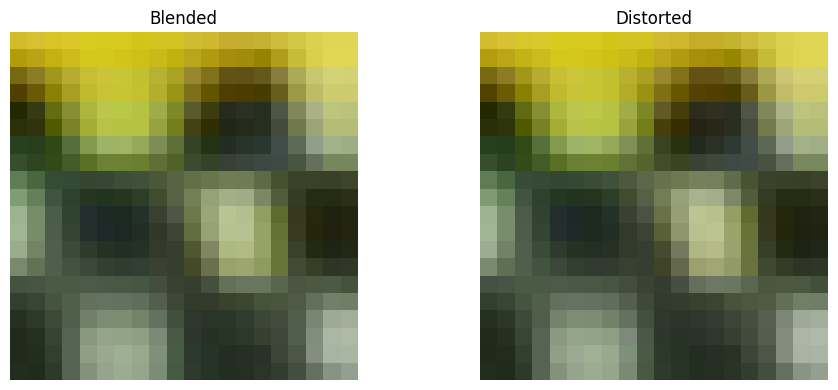

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
from  matplotlib import pyplot as plt
from IPython.display import clear_output, display

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title("Blended"); axes[0].axis('off')
axes[1].set_title("Distorted"); axes[1].axis('off')


for r, _ in zip(range(20, len(new_crops)), range(50)):
    row = dataset_metadata[dataset_metadata.score == 0].iloc[r]
    img_clean, img_distorted = load_clean_distorted(row)
    img_blended = new_crops[r][1]

    axes[0].imshow(img_blended)
    axes[1].imshow(img_distorted)
    plt.tight_layout()

    clear_output(wait=True)
    display(fig)
    plt.close(fig)
    plt.pause(2)

## Save New Crops

In [ ]:
from tqdm import tqdm
from PIL import Image

for new_meta, new_crop in tqdm(new_crops, desc="Saving new crops"):
    method = new_meta['metadata']['method']
    id = new_meta['distorted_image']

    new_crop_path = os.path.join(path_dataset, method, f'{id}.png')
    if os.path.exists(new_crop_path):
        continue

    Image.fromarray(new_crop).save(new_crop_path)

Saving new crops: 100%|██████████| 1983/1983 [00:28<00:00, 69.26it/s]


In [ ]:
new_meta = [meta for meta, _ in new_crops]

with open(path_dataset_metadata) as meta:
    old_meta = json.load(meta)

new_dataset_metadata = old_meta + new_meta
new_dataset_metadata.sort(key=lambda crop: crop['clean_image'])

with open(path_dataset_metadata, 'w') as meta:
    json.dump(new_dataset_metadata, meta, indent=2)


## Fix Train Test Split

In [ ]:
path_train = os.path.join(path_dataset, 'train_metadata.json')
path_test = os.path.join(path_dataset, 'test_metadata.json')

with open(path_train) as train, open(path_test) as test:
    train_meta = json.load(train)
    test_meta = json.load(test)

train_df = pd.DataFrame(train_meta)
test_df = pd.DataFrame(test_meta)
new_meta_df = pd.DataFrame(new_meta)

In [ ]:
display(train_df.metadata.apply(lambda crop: crop['method']).value_counts())

display(train_df.score.value_counts().sort_index())

display(test_df.score.value_counts().sort_index())

,count
metadata,
new,1490
ref,1468


,count
score,
0.0,1594
0.5,497
1.0,867


,count
score,
0.0,389
0.5,127
1.0,224


In [ ]:
display(new_meta_df.metadata.apply(lambda crop: crop['method']).value_counts())


,count
metadata,
new,1012
ref,971


In [ ]:
train_diff = train_df.score.value_counts()[1] - train_df.score.value_counts()[0.5]
test_diff = test_df.score.value_counts()[1] - test_df.score.value_counts()[0.5]

blended_new = [crop for crop in new_meta if crop['metadata']['method'] == 'new']
blended_ref = [crop for crop in new_meta if crop['metadata']['method'] == 'ref']

from sklearn.model_selection import train_test_split

added_train_new, new_for_test = train_test_split(blended_new, train_size=train_diff // 2, random_state=42)
added_train_ref, ref_for_test = train_test_split(blended_ref, train_size=train_diff - train_diff // 2, random_state=42)
added_train = added_train_new + added_train_ref

added_test_new, _ = train_test_split(new_for_test, train_size=test_diff // 2, random_state=42)
added_test_ref, _ = train_test_split(ref_for_test, train_size=test_diff - test_diff // 2, random_state=42)
added_test = added_test_new + added_test_ref




In [ ]:
new_train_meta = train_meta + added_train
new_test_meta = test_meta + added_test

with open(path_train, 'w') as train, open(path_test, 'w') as test:
    json.dump(new_train_meta, train, indent=2)
    json.dump(new_test_meta, test, indent=2)